In [18]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [19]:
def img_to_matrix(x):
    return (1 - x*1./255)[:,:,0]
def matrix_to_img(x):
    return ((1 - x)*255).astype(np.uint8).reshape(*x.shape,1).repeat(3,-1)

In [20]:
def gauss(x, x0, eps):
    r = np.linalg.norm(x-x0)
    return np.exp(-(eps*r)**2)

In [46]:
def gauss_ani(x, x0, eps):
    return np.exp(-np.dot(eps, x-x0)**2)

In [47]:
x = img_to_matrix(cv2.imread('data/clean_finger.png'))

In [50]:
x0 = np.array([128, 128])
c = np.empty_like(x)
for i in range(x.shape[0]):
    for j in range(x.shape[1]):
        c[i,j] = gauss(np.array([i,j]), x0, 1e-2)

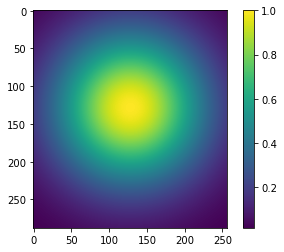

In [51]:
plt.imshow(c); plt.colorbar();

In [89]:
x0 = np.array([150, 128])
c = np.empty_like(x)
for i in range(x.shape[0]):
    for j in range(x.shape[1]):
        c[i,j] = gauss(np.array([i,j]), x0, 1e-2)

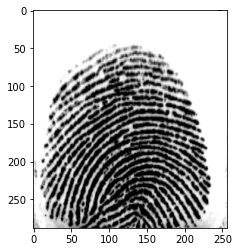

In [90]:
plt.imshow(1-x, cmap='gray')

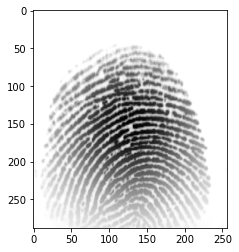

In [96]:
plt.imshow(1-c*x, cmap='gray')

In [94]:
new = c*x
new /= np.sum(new)
new *= np.sum(x)

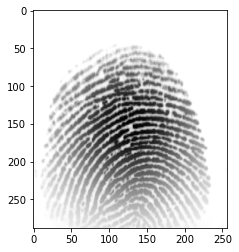

In [95]:
plt.imshow(1-new, cmap='gray')